Syntax natürlicher Sprachen, WS 2025/26

# 05 - Übung (Lösung)

In [13]:
import nltk
from nltk import Tree
from nltk import DependencyGraph
from spacy import displacy
from itertools import chain

In [14]:
def _tree_labeled(self, i):
    node = self.get_by_address(i)
    word, rel = node["word"], node["rel"]
    deps = sorted(chain.from_iterable(node["deps"].values()))
    return Tree(word + '(' + rel + ')', [self._tree_labeled(dep) for dep in deps]) if deps else word + '(' + rel + ')'

def tree_labeled(self):
    node = self.root
    word, rel = node["word"], node["rel"]
    deps = sorted(chain.from_iterable(node["deps"].values()))
    return Tree(word+'('+rel+')', [self._tree_labeled(dep) for dep in deps])

DependencyGraph._tree_labeled = _tree_labeled
DependencyGraph.tree_labeled = tree_labeled

def transform_nr_conll(sent_nr):
    sent_list = []
    for line in list(filter(None, sent_nr.split("\n"))):
        line_list = line.split(); line_list.pop(0); line_list.insert(1,"_")
        sent_list.append(" ".join([i for i in line_list[0:]]))
    return "\n".join([i for i in sent_list[0:]])

def displacy_dep_input(sent):
    deps = []
    for dep in sent.split('\n'):
        deps.append(dep.split())
    deps = [x for x in deps if x]
    ex, word_list, arc_list = [], [], []
    for index, dep in enumerate(deps):
        word_list.append({"text": dep[0], "tag": ""})
        line = index+1; head = int(dep[2]); label = dep[3]
        if head>line:
            start = index; end = head-1; direction = "left"
        else:
            start = head-1; end = index; direction = "right"
        if(label.lower() != "root"):
            arc_list.append({"start": start, "end": end, "label": label, "dir": direction})
    ex.append({"words": word_list,"arcs": arc_list})
    return ex

def show_dep_trees(sent_nr,style=1):
    sent = transform_nr_conll(sent_nr)
    dg = DependencyGraph(sent)
    if style == 0 or style == 2:
        tree_labeled = dg.tree_labeled()
        tree_labeled.pretty_print(unicodelines=True)   
    if style == 1 or style == 2:
        ex = displacy_dep_input(sent)
        html = displacy.render(ex, style="dep", manual=True, options={'distance':100})


## Aufgabe 1 - Darstellung von Dependenz-Strukturen


#### Geben Sie in folgender Codezelle den entsprechenden Klammerausdruck der Dependenzstruktur des folgenden Satzes an und generieren Sie den entsprechenden Syntaxbaum, indem Sie die Codezelle anschließend ausführen.


In [3]:
tree = Tree.fromstring("""
(fischt
    (Fritz
        Fischers
    )
    (Fische
        die
    )
    (Fluss
        aus
        dem
    )
)
""")

tree.pretty_print(unicodelines=True)

         fischt              
   ┌───────┼──────────┐       
 Fritz   Fische     Fluss    
   │       │     ┌────┴────┐  
Fischers  die   aus       dem



## Aufgabe 2 - Dependenzgrammatik

#### Schreiben Sie eine ungelabelte, minimale Dependenzgrammatik, die genau die syntaktische Struktur des folgenden Beispielsatzes modelliert:
*der laute Hund im Park jagte gestern die Katze über die Wiese*

In [12]:
sent = "der laute Hund im Park jagte gestern die Katze über die Wiese"

grammar = nltk.DependencyGrammar.fromstring(
"""
'Hund' -> 'der'
'Hund' -> 'laute'
'jagte' -> 'Hund'
'Park' -> 'im'
'Hund' -> 'Park'
'jagte' -> 'gestern'
'Katze' -> 'die'
'jagte' -> 'Katze'
'Wiese' -> 'über' 
'Wiese' -> 'die'
'jagte' -> 'Wiese'

## weitere Depenendenzregeln über die Satzstruktur hinaus:
#'jagte' -> 'Park'
#'Katze' -> 'laute'
""")

parser = nltk.ProjectiveDependencyParser(grammar)
for tree in parser.parse(sent.split()):
    print(tree)
    tree.pretty_print(unicodelines=True)

(jagte
  (Hund der laute (Park im))
  gestern
  (Katze die)
  (Wiese über die))
                  jagte                     
   ┌──────────┬─────┴─────┬──────────┐       
   │         Hund         │          │      
   │     ┌────┼─────┐     │          │       
   │     │    │    Park Katze      Wiese    
   │     │    │     │     │    ┌─────┴────┐  
gestern der laute   im   die  über       die



## Aufgabe 3 - Erweiterung Dependenzgrammatik

#### Das NLTK lässt beim Schreiben von Dependenzgrammatiken lediglich die Beschreibung der Abhängigkeiten zwischen Wörtern zu. Dadurch werden Dependenzgrammatiken leicht redundant. Betrachten Sie das folgende Beispiel:

In [4]:
sent = "der Mann gibt der Frau das Buch"

In [5]:
grammar = nltk.DependencyGrammar.fromstring("""
'gibt' -> 'Mann' | 'Frau' | 'Buch'
'schenkt' -> 'Mann' | 'Frau' | 'Buch'
'Mann' -> 'der'
'Frau' -> 'der' | 'die'
'Buch' -> 'das'
""")

parser = nltk.ProjectiveDependencyParser(grammar)
for tree in parser.parse(sent.split()):
    tree.pretty_print(unicodelines=True)

     gibt     
 ┌────┼────┐   
Mann Frau Buch
 │    │    │   
der  der  das 



### a) Erweitern Sie die Grammatik um die Verben aus Aufgabe 2 von Übungsblatt 4:
- *schläft*
- *gefällt*
- *kennt*

In [6]:
sents = [
    "der Mann gibt der Frau das Buch",
    "der Mann schläft",
    "das Buch gefällt der Frau",
    "die Frau kennt das Buch"    
]

In [7]:
grammar = nltk.DependencyGrammar.fromstring("""
'gibt' -> 'Mann' | 'Frau' | 'Buch'
'schenkt' -> 'Mann' | 'Frau' | 'Buch'
'Mann' -> 'der'
'Frau' -> 'der' | 'die'
'Buch' -> 'das'

'schläft' -> 'Mann' | 'Frau' | 'Buch'
'gefällt' -> 'Mann' | 'Frau' | 'Buch'
'kennt' -> 'Mann' | 'Frau' | 'Buch'

""")

parser = nltk.ProjectiveDependencyParser(grammar)

for sent in sents:
    trees = list(parser.parse(sent.split()))
    if trees: [tree.pretty_print(unicodelines=True) for tree in trees]
    else: print(f"no parse found for:")
    print(sent,"\n","_"*50)

     gibt     
 ┌────┼────┐   
Mann Frau Buch
 │    │    │   
der  der  das 

der Mann gibt der Frau das Buch 
 __________________________________________________
schläft
   │    
  Mann 
   │    
  der  

der Mann schläft 
 __________________________________________________
     gefällt     
 ┌──────┴─────┐   
Buch         Frau
 │            │   
das          der 

das Buch gefällt der Frau 
 __________________________________________________
     kennt     
 ┌─────┴────┐   
Frau       Buch
 │          │   
die        das 

die Frau kennt das Buch 
 __________________________________________________


### b) Erweitern Sie die Grammatik nun um Adjektive:
- *kluge*
- *schöne*
- *dicke*

In [8]:
sents= [
    "die kluge schöne Frau kennt das Buch",
    "der schöne kluge Mann gibt der Frau das dicke Buch",
    "das dicke schöne kluge Buch schläft"
]

In [9]:
grammar = nltk.DependencyGrammar.fromstring("""
'gibt' -> 'Mann' | 'Frau' | 'Buch'
'schenkt' -> 'Mann' | 'Frau' | 'Buch'
'Mann' -> 'der'
'Frau' -> 'der' | 'die'
'Buch' -> 'das'

'schläft' -> 'Mann' | 'Frau'| 'Buch'
'gefällt' -> 'Mann' | 'Frau' | 'Buch'
'kennt' -> 'Mann' | 'Frau' | 'Buch'

'Frau' -> 'schöne' | 'kluge' | 'dicke'
'Mann' -> 'schöne' | 'kluge' | 'dicke'
'Buch' -> 'schöne' | 'kluge' | 'dicke'

""")

parser = nltk.ProjectiveDependencyParser(grammar)

for sent in sents:
    trees = list(parser.parse(sent.split()))
    if trees: [tree.pretty_print(unicodelines=True) for tree in trees]
    else: print(f"no parse found for:")
    print(sent,"\n","_"*50)

          kennt            
      ┌─────┴───────────┐   
     Frau              Buch
 ┌────┼───────────┐     │   
die kluge       schöne das 

die kluge schöne Frau kennt das Buch 
 __________________________________________________
            gibt                    
      ┌──────┴────┬────────┐         
     Mann        Frau     Buch      
 ┌────┼──────┐    │    ┌───┴─────┐   
der schöne kluge der  das      dicke

der schöne kluge Mann gibt der Frau das dicke Buch 
 __________________________________________________
    schläft             
       │                 
      Buch              
 ┌─────┼──────┬──────┐   
das  dicke  schöne kluge

das dicke schöne kluge Buch schläft 
 __________________________________________________


## Aufgabe 4 - Manuelle Dependenzanalyse

#### Stellen Sie folgenden Satz im Dependenzmodell dar:
- Die neue Kollegin fährt mit der S-Bahn zu ihrem neuen Arbeitsplatz.

### a) Ergänzen Sie dafür zunächst den Konstituentenbaum mit Angabe der hochgereichten Köpfe


(verwendete Regeln für Baum:
`S=NP+VP`, `NP=DET+(ADJ)+N`, `PP=P+NP`, `VP=V+(PP)*`)

#### Bestimmen Sie die Köpfe gemäß der UD *Primacy of Content Words*:
(`head(PP) = head(NP)`)

(`head(S) = head(VP)`)


                                      S (fährt)                                                                           
          ┌───────────────────────────────┴──────────────────────┐                                                         
          │                                                  VP (fährt)                                                   
          │                  ┌────────────┬──────────────────────┴────────────────────────┐                                
          │                  │       PP (S-Bahn)                                  PP (Arbeitsplatz)                       
          │                  │    ┌───────┴───────────┐                  ┌────────────────┴─────────────────┐              
    NP (Kollegin)            │    │              NP (S-Bahn)             │                          NP (Arbeitsplatz)     
 ┌────────┼──────────┐       │    │       ┌───────────┴──────────┐       │    ┌─────────────────────────────┼──────────┐   
DET      ADJ

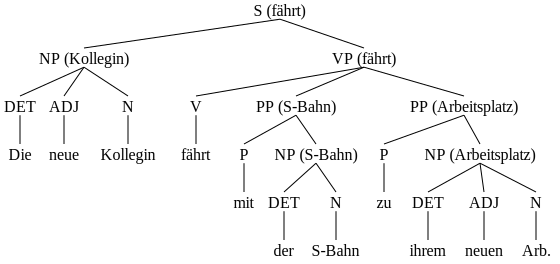

In [15]:
np1 = Tree(
    'NP (Kollegin)',
    [Tree('DET', ['Die']), Tree('ADJ', ['neue']), Tree('N', ['Kollegin'])]
)
vp = Tree(
    'VP (fährt)',
    [
        Tree('V', ['fährt']),
        Tree('PP (S-Bahn)', [
            Tree('P', ['mit']),
            Tree('NP (S-Bahn)', [
                Tree('DET', ['der']),
                Tree('N', ['S-Bahn'])
            ])
        ]),
        Tree('PP (Arbeitsplatz)', [
            Tree('P', ['zu']),
            Tree('NP (Arbeitsplatz)', [
                Tree('DET', ['ihrem']),
                Tree('ADJ', ['neuen']),
                Tree('N', ['Arb.'])
            ])
        ])
    ]
)
s = Tree(
    'S (fährt)',
    [np1, vp]
)

s.pretty_print(unicodelines=True)
display(s)

### b) Fertigen Sie nun eine Tabelle an, in der Sie zu jedem Kopfwort seine Dependenten notieren. Für jede Gruppe unmittelbarer Konstituenten einer Phrase (Ko-Konstituenten) gilt dabei, dass die nicht-hochgereichten Köpfe die Dependenten des hochgereichten Kopfes sind (Nicht-Köpfe in der Phrase sind abhängig vom Kopf der Phrase).

|Kopf|Dependenten|
|----|-----------|
|fährt|Kollegin, S-Bahn, Arbeitsplatz|
|S-Bahn|mit, der|
|Arbeitsplatz|zu, ihrem, neuen|
|Kollegin|die, neue|

### c) Konvertieren Sie Ihre Tabelle nun in einen Dependenzbaum (Stemma).

                             fährt                       
        _______________________|____________              
    Kollegin          S-Bahn           Arbeitsplatz      
  _____|______      ____|______      _______|_________    
die          neue mit         der   zu    ihrem     neuen



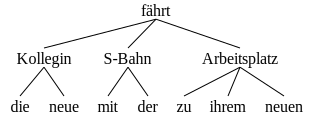

In [17]:
dep_tree_alt = Tree(
     "fährt",
    [
        Tree("Kollegin", ["die", "neue"]),
        Tree("S-Bahn", ["mit", "der"]),
        Tree("Arbeitsplatz", ["zu", "ihrem", "neuen"])
    ]
)

dep_tree_alt.pretty_print()
display(dep_tree_alt)

### d) Welche Konstituenten lassen sich anhand der Struktur des Dependenzbaumes identifizieren?

In [ ]:
# ##### Teilbäume als Konstituenten:

# - [die neue Kollegin]
# - [mit der S-Bahn]
# - [zu ihrem neuen Arbeitsplatz]
# - [Die neue Kollegin fährt mit der S-Bahn zu ihrem neuen Arbeitsplatz]

# aber nicht die VP [fährt mit der S-Bahn zu ihrem neuen Arbeitsplatz] !


## Aufgabe 5 - Übergangsbasierter Shift-Reduce-Dependency-Parser

#### Betrachten Sie folgende Dependenzanalyse, die die Reihenfolge der Durchführung der REDUCE-Übergänge (`LEFTARC`, `RIGHTARC`) mit einem Shift-Reduce-Dependency-Parser angibt:

In [12]:
sent_nr = """
1 canceled 0 ROOT
2 flights 1 RIGHTARC-3
3 to 4 LEFTARC-1
4 Houston 2 RIGHTARC-2
"""

show_dep_trees(sent_nr)

Der übergangsbasierte Shift-Reduce-Dependency-Parser schiebt Wörter auf den Stack und reduziert, wenn zwischen den obersten Elementen eine Dependenzrelation vorliegt (gelernt aus Trainingsdaten oder in Grammatik gegeben), indem der Dependent vom Stack entfernt wird, und die entsprechende Relation gespeichert wird. 

Dabei darf REDUCE bei einer möglichen RIGHTARC-Relation (Dependent rechts vom Kopf) nur durchgeführt werden, wenn der Dependent nicht mehr Kopf sein kann (dann erste SHIFT):

| STACK | BUFFER | TRANSITION |
|-------|--------|------------|
|   ROOT    |   canceled flights to Houston     |      Init      |
|   ROOT canceled flights    |    to Houston     |    2 x SHIFT        |
|   ROOT canceled flights to   |     Houston     |    SHIFT (nicht REDUCE wg. RIGHTARC-Bedingung)        |
|   ROOT canceled flights to Houston    |         |    SHIFT       |
|   ROOT canceled flights Houston    |         |    __LEFTARC__ (to <- Houston)       |
|   ROOT canceled flights    |         |    __RIGHTARC__ (flight -> Houston)       |
|   ROOT canceled    |         |    __RIGHTARC__ (canceled -> flights)       |
|   ROOT    |         |    Done (ROOT -> canceled)       |


#### Gegeben sei nun folgender Dependenzgraph:

In [13]:
sent_nr = """
1 ein 3 -
2 elektrisches 3 -
3 Auto 4 -
4 fährt 0 ROOT
5 schnell 4 - 
"""

show_dep_trees(sent_nr)

#### Geben Sie (analog zum obigen Beispiel) den Typ der REDUCE-Übergänge (`LEFTARC`, `RIGHTARC`) sowie die Reihenfolge deren Durchführung bei Verarbeitung dieser Struktur mit einem Shift-Reduce-Dependency-Parser an.


In [ ]:
#[ ROOT ein elektrisches Auto] 3 x SHIFT
#[ ROOT ein Auto] REDUCE 'elektrisches' (LEFTARC-1) = Dependent vom Stack löschen und Relation annotieren 
#[ ROOT Auto] REDUCE 'ein' (LEFTARC-2)
#[ ROOT Auto fährt] SHIFT
#[ ROOT fährt] REDUCE 'Auto' (LEFTARC-3)
#[ ROOT fährt schnell] SHIFT
#[ ROOT fährt] REDUCE 'schnell' (RIGHTARC-4)
#[ ROOT ] FINAL

In [14]:
sent_nr = """
1 ein 3 LEFTARC-2
2 elektrisches 3 LEFTARC-1
3 Auto 4 LEFTARC-3
4 fährt 0 ROOT
5 schnell 4 RIGHTARC-4
"""

show_dep_trees(sent_nr)

| STACK | BUFFER | TRANSITION | REDUCE STEP NO.
|-------|--------|------------| ---------|
|   ROOT ein elektr Auto    |    fährt schnell    |    3 x SHIFT        | |
|   ROOT ein Auto    |   fährt schnell     |     LEFTARC       | 1 |
|   ROOT Auto    |   fährt schnell     |     LEFTARC       | 2 |
|   ROOT Auto fährt     |   schnell     |     SHIFT       | |
|  ROOT fährt     |   schnell     |     LEFTARC       | 3 |
|  ROOT fährt schnell     |        |     SHIFT       | |
|    ROOT fährt   |        |      RIGHTARC      | 4 |
|    ROOT   |        |      Done      | |


## *Aufgabe 6 - Ergänzungen vs. Angaben*

#### Diskutieren Sie die Problematik der Unterscheidung von Ergänzungen (Komplemente) und Angaben (verbale Adjunkte) mit Bezug auf die folgenden Sätze:
1. *Peter steigt auf das Pferd.*
2. *Peter besteigt das Pferd.*
3. *Peter reitet das Pferd.*

#### Welche Ergebnisse liefern die Tests zur Komplement/Adjunkt-Differenzierung?

In [ ]:
# Lösung (PP-Satzglieder können Komplement sein, also eine vom Verb geforderte adverbiale Ergänzung)
# a) 1. Satz: "auf das Pferd"

#Eliminierungstest (NEIN): Komplement
#geschehens-Test (NEIN): Komplement
#Adverbialsatz-Test (NEIN): Komplement

In [ ]:
# Lösung (Satzglied ist Komplement/Ergänzung)
# b) 2. Satz: "das Pferd"

#Eliminierungstest (NEIN): Komplement
#geschehens-Test (NEIN): Komplement
#Adverbialsatz-Test (NEIN): Komplement

In [ ]:
# Lösung (Satzglied ist fakultative Ergänzung)
# b) 3. Satz: "das Pferd"

#Eliminierungstest (JA): Adjunkt/Angabe
#geschehens-Test (NEIN): Komplement
#Adverbialsatz-Test (NEIN): Komplement